# APS360 Project -- Model for Geoguessr

<h1>Data Collection and Processing</h1>

In [ ]:
!pip install google-streetview

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for google-streetview: filename=google_streetview-1.2.9-py3-none-any.whl size=9777 sha256=7547f748e3844a1cac63f4981dc70ab1bb81638dac6e9e31991cf7e47ae4c47e
  Stored in directory: /root/.cache/pip/wheels/07/79/e9/08b227c1d0b5ee57de69fe67dd0deda082bab4f4cedbadbfec
  Created wheel for kwconfig: filename=kwconfig-1.1.7-py3-none-any.whl size=4975 sha256=7e7e8532a2aae4e6be4071ca836da79c4d71b9706e2377c92734766cb84744c4
  Stored in directory: /root/.cache/pip/wheels/e6/73/f1/81fc7294aa9976c64f766e0f973314ac3f173a24e9c9f0117b
Successfully built google-streetview kwconfig


In [ ]:
from google.colab import drive
import os
import requests
from PIL import Image
from io import BytesIO
import google_streetview.api
import random
import shutil

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Canadian Provinces and US States Latitude and Longitudes
provinces_borders = [
    {
        "province": "Alberta",
        "northern_border": 60.0000,
        "southern_border": 49.0000,
        "eastern_border": -110.0000,
        "western_border": -120.0000
    },
    {
        "province": "British Columbia",
        "northern_border": 60.0000,
        "southern_border": 48.3000,
        "eastern_border": -114.0000,
        "western_border": -139.0000
    },
    {
        "province": "Manitoba",
        "northern_border": 60.0000,
        "southern_border": 49.0000,
        "eastern_border": -95.0000,
        "western_border": -102.0000
    },
    {
        "province": "New Brunswick",
        "northern_border": 48.0000,
        "southern_border": 45.0000,
        "eastern_border": -63.0000,
        "western_border": -68.0000
    },
    {
        "province": "Newfoundland and Labrador",
        "northern_border": 60.0000,
        "southern_border": 46.0000,
        "eastern_border": -52.0000,
        "western_border": -67.0000
    },
    {
        "province": "Nova Scotia",
        "northern_border": 47.0000,
        "southern_border": 43.0000,
        "eastern_border": -59.0000,
        "western_border": -66.0000
    },
    {
        "province": "Ontario",
        "northern_border": 56.8500,
        "southern_border": 41.6700,
        "eastern_border": -74.3200,
        "western_border": -95.1500
    },
    {
        "province": "Prince Edward Island",
        "northern_border": 47.1000,
        "southern_border": 45.9500,
        "eastern_border": -62.0000,
        "western_border": -64.4500
    },
    {
        "province": "Quebec",
        "northern_border": 62.5800,
        "southern_border": 45.0100,
        "eastern_border": -57.1000,
        "western_border": -79.7700
    },
    {
        "province": "Saskatchewan",
        "northern_border": 60.0000,
        "southern_border": 49.0000,
        "eastern_border": -101.3600,
        "western_border": -110.0000
    },
    {
        "province": "Northwest Territories",
        "northern_border": 83.1139,
        "southern_border": 60.0000,
        "eastern_border": -102.0000,
        "western_border": -136.5000
    },
    {
        "province": "Nunavut",
        "northern_border": 83.1139,
        "southern_border": 60.0000,
        "eastern_border": -61.9500,
        "western_border": -110.0000
    },
    {
        "province": "Yukon",
        "northern_border": 69.6500,
        "southern_border": 60.0000,
        "eastern_border": -123.0000,
        "western_border": -141.0000
    },
    {
        "province": "Alabama",
        "northern_border": 35.0080,
        "southern_border": 30.1377,
        "eastern_border": -84.8882,
        "western_border": -88.4731
    },
    {
        "province": "Alaska",
        "northern_border": 71.5388,
        "southern_border": 54.9011,
        "eastern_border": -129.9742,
        "western_border": -172.4610
    },
    {
        "province": "Arizona",
        "northern_border": 37.0043,
        "southern_border": 31.3322,
        "eastern_border": -109.0452,
        "western_border": -114.8186
    },
    {
        "province": "Arkansas",
        "northern_border": 36.4996,
        "southern_border": 33.0041,
        "eastern_border": -89.6444,
        "western_border": -94.6179
    },
    {
        "province": "California",
        "northern_border": 42.0095,
        "southern_border": 32.5343,
        "eastern_border": -114.1312,
        "western_border": -123.0000
    },
    {
        "province": "Colorado",
        "northern_border": 41.0034,
        "southern_border": 36.9931,
        "eastern_border": -102.0415,
        "western_border": -109.0452
    },
    {
        "province": "Connecticut",
        "northern_border": 42.0506,
        "southern_border": 40.9509,
        "eastern_border": -71.7869,
        "western_border": -73.7278
    },
    {
        "province": "Delaware",
        "northern_border": 39.8390,
        "southern_border": 38.4510,
        "eastern_border": -75.4144,
        "western_border": -75.7890
    },
    {
        "province": "Florida",
        "northern_border": 31.0007,
        "southern_border": 24.3963,
        "eastern_border": -81.0000,
        "western_border": -87.6349
    },
    {
        "province": "Georgia",
        "northern_border": 35.0008,
        "southern_border": 30.3578,
        "eastern_border": -81.0000,
        "western_border": -85.6052
    },
    {
        "province": "Hawaii",
        "northern_border": 23.0000,
        "southern_border": 18.9106,
        "eastern_border": -154.8060,
        "western_border": -161.7550
    },
    {
        "province": "Idaho",
        "northern_border": 49.0018,
        "southern_border": 42.0000,
        "eastern_border": -111.0430,
        "western_border": -117.2430
    },
    {
        "province": "Illinois",
        "northern_border": 42.5116,
        "southern_border": 36.9703,
        "eastern_border": -87.4952,
        "western_border": -91.5131
    },
    {
        "province": "Indiana",
        "northern_border": 41.7610,
        "southern_border": 37.7718,
        "eastern_border": -84.7846,
        "western_border": -88.0978
    },
    {
        "province": "Iowa",
        "northern_border": 43.5012,
        "southern_border": 40.3755,
        "eastern_border": -90.1401,
        "western_border": -96.6395
    },
    {
        "province": "Kansas",
        "northern_border": 40.0032,
        "southern_border": 36.9931,
        "eastern_border": -94.5884,
        "western_border": -102.0518
    },
    {
        "province": "Kentucky",
        "northern_border": 39.1483,
        "southern_border": 36.4972,
        "eastern_border": -81.9645,
        "western_border": -89.5715
    },
    {
        "province": "Louisiana",
        "northern_border": 33.0195,
        "southern_border": 28.9210,
        "eastern_border": -88.8170,
        "western_border": -94.0431
    },
    {
        "province": "Maine",
        "northern_border": 47.4598,
        "southern_border": 44.0000,
        "eastern_border": -67.0000,
        "western_border": -71.0846
    },
    {
        "province": "Maryland",
        "northern_border": 39.7220,
        "southern_border": 37.9117,
        "eastern_border": -76.0000,
        "western_border": -79.4778
    },
    {
        "province": "Massachusetts",
        "northern_border": 42.8868,
        "southern_border": 41.2379,
        "eastern_border": -70.0000,
        "western_border": -73.5081
    },
    {
        "province": "Michigan",
        "northern_border": 48.3060,
        "southern_border": 41.6961,
        "eastern_border": -82.1220,
        "western_border": -90.4181
    },
    {
        "province": "Minnesota",
        "northern_border": 49.3844,
        "southern_border": 43.4994,
        "eastern_border": -89.4913,
        "western_border": -97.2392
    },
    {
        "province": "Mississippi",
        "northern_border": 35.0080,
        "southern_border": 30.1377,
        "eastern_border": -88.0978,
        "western_border": -91.6550
    },
    {
        "province": "Missouri",
        "northern_border": 40.6136,
        "southern_border": 35.9957,
        "eastern_border": -89.0988,
        "western_border": -95.7747
    },
    {
        "province": "Montana",
        "northern_border": 49.0012,
        "southern_border": 44.3582,
        "eastern_border": -104.0475,
        "western_border": -116.0500
    },
    {
        "province": "Nebraska",
        "northern_border": 43.0026,
        "southern_border": 39.9998,
        "eastern_border": -95.3080,
        "western_border": -104.0535
    },
    {
        "province": "Nevada",
        "northern_border": 42.0022,
        "southern_border": 35.0019,
        "eastern_border": -114.0396,
        "western_border": -120.0057
    },
    {
        "province": "New Hampshire",
        "northern_border": 45.3058,
        "southern_border": 42.6967,
        "eastern_border": -70.6111,
        "western_border": -72.5572
    },
    {
        "province": "New Jersey",
        "northern_border": 41.3572,
        "southern_border": 38.9285,
        "eastern_border": -73.8934,
        "western_border": -75.5636
    },
    {
        "province": "New Mexico",
        "northern_border": 37.0001,
        "southern_border": 31.3322,
        "eastern_border": -103.0021,
        "western_border": -109.0452
    },
    {
        "province": "New York",
        "northern_border": 45.0153,
        "southern_border": 40.4957,
        "eastern_border": -71.8516,
        "western_border": -79.7624
    },
    {
        "province": "North Carolina",
        "northern_border": 36.5881,
        "southern_border": 33.8423,
        "eastern_border": -76.0000,
        "western_border": -84.3219
    },
    {
        "province": "North Dakota",
        "northern_border": 49.0008,
        "southern_border": 45.9351,
        "eastern_border": -96.5544,
        "western_border": -104.0494
    },
    {
        "province": "Ohio",
        "northern_border": 41.9778,
        "southern_border": 38.4032,
        "eastern_border": -80.5188,
        "western_border": -84.8203
    },
    {
        "province": "Oklahoma",
        "northern_border": 37.0024,
        "southern_border": 33.6158,
        "eastern_border": -94.4307,
        "western_border": -103.0025
    },
    {
        "province": "Oregon",
        "northern_border": 46.2920,
        "southern_border": 41.9918,
        "eastern_border": -116.4633,
        "western_border": -123.0000
    },
    {
        "province": "Pennsylvania",
        "northern_border": 42.2696,
        "southern_border": 39.7198,
        "eastern_border": -74.6895,
        "western_border": -80.5199
    },
    {
        "province": "Rhode Island",
        "northern_border": 42.0188,
        "southern_border": 41.1460,
        "eastern_border": -71.1206,
        "western_border": -71.8628
    },
    {
        "province": "South Carolina",
        "northern_border": 35.2155,
        "southern_border": 32.0330,
        "eastern_border": -78.0000,
        "western_border": -83.3540
    },
    {
        "province": "South Dakota",
        "northern_border": 45.9455,
        "southern_border": 42.4797,
        "eastern_border": -96.4365,
        "western_border": -104.0576
    },
    {
        "province": "Tennessee",
        "northern_border": 36.6779,
        "southern_border": 34.9829,
        "eastern_border": -81.6469,
        "western_border": -90.3103
    },
    {
        "province": "Texas",
        "northern_border": 36.5007,
        "southern_border": 25.8374,
        "eastern_border": -93.5083,
        "western_border": -106.6456
    },
    {
        "province": "Utah",
        "northern_border": 42.0016,
        "southern_border": 36.9989,
        "eastern_border": -109.0410,
        "western_border": -114.0520
    },
    {
        "province": "Vermont",
        "northern_border": 45.0130,
        "southern_border": 42.7269,
        "eastern_border": -71.4651,
        "western_border": -73.4377
    },
    {
        "province": "Virginia",
        "northern_border": 39.4598,
        "southern_border": 36.5408,
        "eastern_border": -75.3964,
        "western_border": -83.6753
    },
    {
        "province": "Washington",
        "northern_border": 49.0025,
        "southern_border": 45.5435,
        "eastern_border": -116.9165,
        "western_border": -123.0000
    },
    {
        "province": "West Virginia",
        "northern_border": 40.6388,
        "southern_border": 37.2015,
        "eastern_border": -77.7195,
        "western_border": -82.6447
    },
    {
        "province": "Wisconsin",
        "northern_border": 47.3098,
        "southern_border": 42.4919,
        "eastern_border": -86.2508,
        "western_border": -92.8881
    },
    {
        "province": "Wyoming",
        "northern_border": 45.0007,
        "southern_border": 40.9949,
        "eastern_border": -104.0530,
        "western_border": -111.0451
    }
]

In [ ]:
# Sorts provinces_borders alphabetically
provinces_borders = sorted(provinces_borders, key=lambda x: x["province"])

In [ ]:
def generate_random_coordinates_for_province(province_name, province_borders, samples=100):
    # Determine the key used for the region name
    province = next((p for p in province_borders if p["province"] == province_name), None)
    # Raise an error if the province key is not found
    if province is None:
        raise ValueError(f"Province '{province_name}' not found in the borders list.")

    # Randomize [samples] different coordinates within the boundaries of the region
    coordinates = []
    for iter in range(samples):
        lat = random.uniform(province["southern_border"], province["northern_border"])
        lon = random.uniform(province["western_border"], province["eastern_border"])
        coordinates.append((lat, lon))

    return coordinates

In [ ]:
def download_images_from_region(region_name, region_borders, images):
  # API Key for Google Streetview Images
  key = "PLACEHOLDER"
  # Get list of randomized coordinates for a region
  coordinates = generate_random_coordinates_for_province(region_name, region_borders, samples = 10000)
  # Set counter for number of coordinates which corresponded to a valid image
  counter = 0
  for coordinate in coordinates:
    # Break once desired number of images are downloaded
    if counter == images:
      break
    # Convert coordinates into valid format for API call
    location = f"{coordinate[0]}, {coordinate[1]}"
    # Set API parameters, randomizing elements like pitch, and setting radius to a large integer to limit number of API calls
    image_parameters = [{'size': '600x600', 'location': location, 'heading': '140.0', 'pitch': random.uniform(-0.85, -0.10), 'key': key, 'radius':20000}]
    # Get image from Google Streetview API (and other metadata)
    results = google_streetview.api.results(image_parameters)
    # Check to see if API call was valid
    if results.metadata[0].get('status') == 'OK':
      counter += 1
      # Download the image
      image_url = results.links[0]
      # Name it using the coordinates
      image_filename = f'{coordinate[0]},{coordinate[1]}.jpg'
      save_path = os.path.join('downloads', image_filename)

      #Download image using URL
      results.download_links(save_path)



In [ ]:
def process_downloaded_images():

    # Go through each subfolder that has been downloaded to colab
    for subfolder in os.listdir('downloads'):
        # Get path for the subfolder
        subfolder_path = os.path.join('downloads', subfolder)

        # Check if it's a directory (subfolder)
        if os.path.isdir(subfolder_path):
            # Isolate the jpg file in the subfolder
            for file in os.listdir(subfolder_path):
                if file.endswith('.jpg'):
                    # Take the jpg file out of the subfolder and rename it the name of the subfolder (the coords of the image)
                    image_path = os.path.join(subfolder_path, file)
                    new_name = os.path.join('downloads', f'{subfolder}.jpg')
                    shutil.move(image_path, new_name)

            # Remove all .json files in the subfolder
            for file in os.listdir(subfolder_path):
                if file.endswith('.json'):
                    file_path = os.path.join(subfolder_path, file)
                    os.remove(file_path)

            # Delete the empty subfolder
            os.rmdir(subfolder_path)

In [ ]:
#Format for downloading images from a region
download_images_from_region("Maryland", provinces_borders, 100)
process_downloaded_images()

<h1>Transfer Learning & Data preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
from PIL import Image
import os
import zipfile
import matplotlib.pyplot as plt
from google.colab import files
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset, Dataset, Subset
import torch.optim as optim
import random
from torchvision.datasets import ImageFolder

In [ ]:
def extract_coordinates(file_name):
    base_name = os.path.basename(file_name)
    try:
      lat_lon = base_name.replace('.jpg', '').split(',')
      latitude = float(lat_lon[0])
      longitude = float(lat_lon[1])
    except:
      # If the file name does not contain valid coordinates, set them to None or some default value
      latitude, longitude = None, None
    return latitude, longitude

In [ ]:
class GeoGuessrDataset(ImageFolder):
    def __init__(self, root, transform=None):
        super(GeoGuessrDataset, self).__init__(root, transform)
        self.processor = transform
    def __getitem__(self, index):
        path, target = self.samples[index]
        sample = self.loader(path)
        # Apply the processor
        if self.processor:
            processed = self.processor(images=sample, return_tensors="pt")
            sample = processed["pixel_values"].squeeze(0) #get rid of batch dim since batch size is 1 and data loader will make another batch dim later
        else:
            sample = self.transform(sample)
        latitude, longitude = extract_coordinates(path)

        # Check if coordinates are valid
        if latitude is None or longitude is None:
            return self.__getitem__((index + 1) % len(self.samples))  # Skip to the next sample if invalid

        return sample, target, torch.tensor([latitude, longitude], dtype=torch.float32)


In [ ]:
from transformers import ViTModel, ViTFeatureExtractor, ViTImageProcessor

In [ ]:
from torch.utils.data import Subset

#Set random seed for reproducibility
random.seed(11)

# path = '/content/drive/MyDrive/StreetViewImages/GeoGuessr Project Files'
path = '/content/drive/MyDrive/StreetViewImages/New_Dataset'
model_name = 'google/vit-base-patch16-224-in21k'

# feature_extractor = ViTFeatureExtractor.from_pretrained(model_name, do_normalize = False)
processor = ViTImageProcessor.from_pretrained(model_name)
# inputs = processor(images=image, return_tensors="pt")

# outputs = vit(**inputs, output_attentions = True)
# last_hidden_states = outputs.last_hidden_state
# cls_hidden_state = last_hidden_states[:, 0, :]  # Shape: (batch_size, hidden_size)

# Load the dataset without any transformations
full_dataset = GeoGuessrDataset(root=path, transform=processor)

# Shuffle indices in order to randomize the data
indices = list(range(len(full_dataset)))
random.shuffle(indices)

# Determine the indices that correspond to a 80/10/10 split
train_split = int(0.8 * len(indices))
val_split = int(0.1 * len(indices)) + train_split

# Split the dataset into train, validation, and test sets
train_indices = indices[:train_split]
val_indices = indices[train_split:val_split]
test_indices = indices[val_split:]

train_dataset = Subset(full_dataset, train_indices)
val_dataset = Subset(full_dataset, val_indices)
test_dataset = Subset(full_dataset, test_indices)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"Train set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")


Train set size: 5824
Validation set size: 728
Test set size: 729


In [ ]:
# Function to denormalize and plot an image
def imshow(img):
    img = img / 2 + 0.5  # Denormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

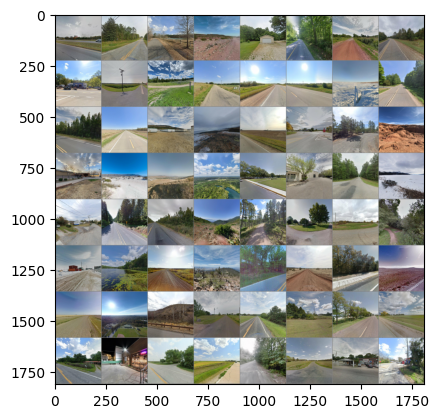

In [ ]:
# Get a batch of training data
dataiter = iter(train_loader)
images, labels, coords = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
import torchvision.models
vit = ViTModel.from_pretrained(model_name)

In [ ]:
# testing
dummy_input = torch.randn(1, 3, 224, 224)

output = vit(dummy_input).last_hidden_state[:, 0, :]

print(output.shape)

torch.Size([1, 768])


In [ ]:
use_cuda = True
if use_cuda and torch.cuda.is_available():
  vit.cuda()
  print('CUDA is available!  restnet_features is on GPU ...')
else:
  print('CUDA is not available.  resnet_features is on CPU ...')
vit.eval()

def extract_features(loader, model):
    new_features = []
    new_labels = []
    new_coords = []

    with torch.no_grad():  # No need to compute gradients for feature extraction
        for inputs, labels, coords in loader:
            outputs = vit(pixel_values = inputs)
            last_hidden_states = outputs.last_hidden_state
            cls_hidden_state = last_hidden_states[:, 0, :]  # Shape: (batch_size, hidden_size)
            new_features.append(cls_hidden_state)
            new_labels.append(labels)
            # new_coords.append(torch.stack(coords, dim=1))  # Ensure coords are correctly combined
            new_coords.append(coords)

    features_tensor = torch.cat(new_features)
    labels_tensor = torch.cat(new_labels)
    coords_tensor = torch.cat(new_coords)

    return features_tensor, labels_tensor, coords_tensor

# Extract features from training, validation, and test data
train_features, train_labels, train_coords = extract_features(train_loader, vit)
val_features, val_labels, val_coords = extract_features(val_loader, vit)
test_features, test_labels, test_coords = extract_features(test_loader, vit)

print(f"Train features shape: {train_features.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Train coords shape: {train_coords.shape}")

CUDA is not available.  resnet_features is on CPU ...
Train features shape: torch.Size([5824, 768])
Train labels shape: torch.Size([5824])
Train coords shape: torch.Size([5824, 2])


In [ ]:
class geoNet(nn.Module):
    def __init__(self):
        super(geoNet, self).__init__()
        self.name = "geo"
        self.fc1 = nn.Linear(768, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.fc4 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.classifier = nn.Linear(64, 63) # Classification head
        self.regressor = nn.Linear(64, 2) # Regression head for (latitude, longitude)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.bn2(self.fc2(x)))
        x = F.relu(self.bn3(self.fc3(x)))
        x = F.relu(self.bn4(self.fc4(x)))
        province_pred = self.classifier(x)
        coords_pred = self.regressor(x)
        return province_pred, coords_pred

In [ ]:
from torch.utils.data import TensorDataset

# Format : tensor = torch.from_numpy(tensor.detach().numpy())
# Making sure Pytorch isn't tracking updates to AlexNet weights
train_features = torch.from_numpy(train_features.cpu().detach().numpy())
val_features = torch.from_numpy(val_features.cpu().detach().numpy())
test_features = torch.from_numpy(test_features.cpu().detach().numpy())
train_labels = torch.from_numpy(train_labels.cpu().detach().numpy())
val_labels = torch.from_numpy(val_labels.cpu().detach().numpy())
test_labels = torch.from_numpy(test_labels.cpu().detach().numpy())
train_coords = torch.from_numpy(train_coords.cpu().detach().numpy())
val_coords = torch.from_numpy(val_coords.cpu().detach().numpy())
test_coords = torch.from_numpy(test_coords.cpu().detach().numpy())

# Create data loaders of smaller batch sizes, like 32
train_inFeatures_dataset = TensorDataset(train_features, train_labels, train_coords)
train_loader_new = DataLoader(train_inFeatures_dataset, batch_size=16, shuffle=True)

val_inFeatures_dataset = TensorDataset(val_features, val_labels, val_coords)
val_loader_new = DataLoader(val_inFeatures_dataset, batch_size=16, shuffle=True)

test_inFeatures_dataset = TensorDataset(test_features, test_labels, test_coords)
test_loader_new = DataLoader(test_inFeatures_dataset, batch_size=16, shuffle=True)

In [ ]:
def get_model_name(name, epoch):

    path = "model_{0}_epoch{1}".format(name, epoch)
    return path

In [ ]:
def calc_acc_new(net, dataloader):
    predictions = []
    batch_labels = []
    coords_preds = []
    batch_coords = []

    with torch.no_grad():  # Make sure gradients are not being calculated
        for features, labels, coords in dataloader:
            if use_cuda and torch.cuda.is_available():
                features = features.cuda()
                labels = labels.cuda()
                coords = coords.cuda()
            # Get model predictions
            province_preds, coords_preds_batch = model(features)
            _, predicted = torch.max(province_preds.data, 1)

            # Add to lists for predictions, labels, and coordinates
            predictions.extend(predicted.cpu().numpy())
            batch_labels.extend(labels.cpu().numpy())
            coords_preds.extend(coords_preds_batch.cpu().numpy())
            batch_coords.extend(coords.cpu().numpy())

    # Convert predictions, labels, and coordinates to numpy arrays
    predictions = np.array(predictions)
    batch_labels = np.array(batch_labels)
    coords_preds = np.array(coords_preds)
    batch_coords = np.array(batch_coords)

    # Calculate the class accuracy
    classification_accuracy = np.mean(predictions == batch_labels)

    # Extract predicted coordinates
    predicted_latitude = coords_preds[:, 0]  # Latitude from coord_preds
    predicted_longitude = coords_preds[:, 1]  # Longitude from coord_preds

    # Extract actual coordinates
    actual_latitude = batch_coords[:, 0] # Latitude from batch_coords
    actual_longitude = batch_coords[:, 1] # Longitude from batch_coords

    # Use great circle distance formula to get spherical distance between the two pairs of coordinates
    predicted_latitude = np.radians(predicted_latitude)
    predicted_longitude = np.radians(predicted_longitude)
    actual_latitude = np.radians(actual_latitude)
    actual_longitude = np.radians(actual_longitude)
    angle = (np.sin(actual_latitude) * np.sin(predicted_latitude) +
                         np.cos(actual_latitude) * np.cos(predicted_latitude) * np.cos(predicted_longitude - actual_longitude))
    # Ensure angle is within domain of arccos
    angle = np.clip(angle, -1.0, 1.0)
    distance = np.arccos(angle) * 6371
    # Calculate score using derived Geogeussr score formula for Canada and USA
    score = np.exp((-1) * distance / 1160.0)

    return classification_accuracy, np.mean(score)


In [ ]:
def combined_loss(region_pred, region_true, coords_pred, coords_true, alpha=1.0, beta=1.0):
    criterion_classification = nn.CrossEntropyLoss()
    criterion_regression = nn.L1Loss() # Mean Absolute Error (MAE)
    loss_classification = criterion_classification(region_pred, region_true)
    loss_regression = criterion_regression(coords_pred, coords_true)
    return beta * loss_classification + alpha * loss_regression

In [ ]:
def train_net(model, train_loader, val_loader, num_epochs, learning_rate):
  criterion_classification = nn.CrossEntropyLoss()
  criterion_regression = nn.L1Loss() # Mean Absolute Error (MAE)
  # optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.0001)
  optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0001)

  scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.1)
  # Training loop
  train_losses = []
  val_losses = []
  train_accuracies = []
  val_accuracies = []
  train_class_accuracies = []
  val_class_accuracies = []
  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0

      for features, regions, coords in train_loader:
          if torch.cuda.is_available():
            features = features.cuda()
            regions = regions.cuda()
            coords = coords.cuda()

          optimizer.zero_grad()

          region_pred, coords_pred = model(features)

          loss = combined_loss(region_pred, regions, coords_pred, coords, alpha=1.0, beta=1.0)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()

      # Validation step
      model.eval()
      val_loss = 0.0
      with torch.no_grad():
          for features, regions, coords in val_loader:
            if torch.cuda.is_available():
              features = features.cuda()
              regions = regions.cuda()
              coords = coords.cuda()

            region_pred, coords_pred = model(features)

            loss = combined_loss(region_pred, regions, coords_pred, coords, alpha=1.0, beta=1.0)
            val_loss += loss.item()

      scheduler.step(val_loss / len(val_loader))
      train_class_acc, train_accuracy = calc_acc_new(model, train_loader)
      val_class_acc, val_accuracy = calc_acc_new(model, val_loader)
      # for plotting later
      val_losses.append(val_loss/len(val_loader))
      val_accuracies.append(val_accuracy)
      train_accuracies.append(train_accuracy)
      train_losses.append(running_loss/len(train_loader))
      train_class_accuracies.append(train_class_acc)
      val_class_accuracies.append(val_class_acc)
      print(f'Epoch {epoch+1}, Train Loss: {running_loss/len(train_loader)}, Val Loss: {val_loss/len(val_loader)}, Train Accuracy: {train_accuracy}, Val Accuracy: {val_accuracy}, Train class acc: {train_class_acc}, Val class acc: {val_class_acc}')
      # Save the current model (checkpoint) to a file
      model_path = get_model_name(model.name, epoch+1)
      torch.save(model.state_dict(), model_path)
  # Plot training curve
  plt.figure(figsize=(15, 5))

  plt.subplot(1, 3, 1)
  plt.plot(range(1, num_epochs + 1), train_losses, label='Training loss')
  plt.plot(range(1, num_epochs + 1), val_losses, label='Validation loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Loss Curve')
  plt.legend()

  plt.subplot(1, 3, 2)
  plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
  plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Accuracy Curve')
  plt.legend()

  plt.subplot(1, 3, 3)
  plt.plot(range(1, num_epochs + 1), train_class_accuracies, label='Train Classification Accuracy')
  plt.plot(range(1, num_epochs + 1), val_class_accuracies, label='Validation Classification Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Accuracy Curve')
  plt.legend()

  plt.show()

CUDA is not available.  Training on CPU ...
Epoch 1, Train Loss: 52.41628066786043, Val Loss: 20.087317052094832, Train Accuracy: 0.2411341369152069, Val Accuracy: 0.2291308045387268, Train class acc: 0.058207417582417584, Val class acc: 0.03571428571428571
Epoch 2, Train Loss: 13.697333909653045, Val Loss: 11.792909477068031, Train Accuracy: 0.46393248438835144, Val Accuracy: 0.45082101225852966, Train class acc: 0.0676510989010989, Val class acc: 0.050824175824175824
Epoch 3, Train Loss: 12.20430571430332, Val Loss: 11.452327790467635, Train Accuracy: 0.48300760984420776, Val Accuracy: 0.465149849653244, Train class acc: 0.08241758241758242, Val class acc: 0.06318681318681318
Epoch 4, Train Loss: 11.461768166049497, Val Loss: 11.31851577758789, Train Accuracy: 0.5060817003250122, Val Accuracy: 0.47086676955223083, Train class acc: 0.09478021978021978, Val class acc: 0.08241758241758242
Epoch 5, Train Loss: 10.870397447229742, Val Loss: 10.60393986494645, Train Accuracy: 0.54486328363

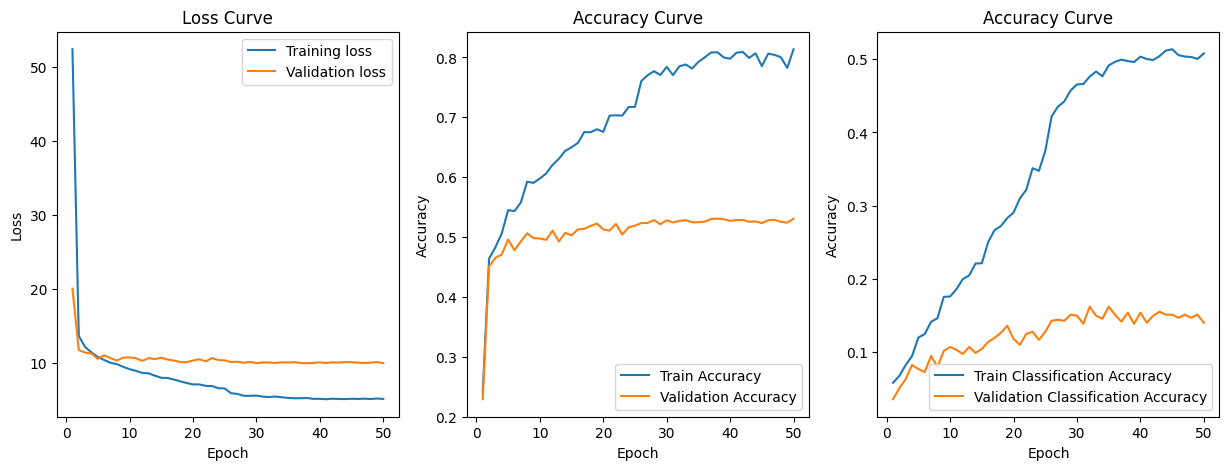

In [ ]:
model = geoNet()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net(model, train_loader_new, val_loader_new, num_epochs=50, learning_rate=1e-3)

In [ ]:
from google.colab import files
model_path = get_model_name('geo', 44)
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h1> Quantitative results

In [ ]:
model = geoNet()
model_path = 'geo_53.07_15.52'
model.load_state_dict(torch.load(model_path))
model.eval()

geoNet(
  (fc1): Linear(in_features=768, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (classifier): Linear(in_features=64, out_features=63, bias=True)
  (regressor): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:
test_class_acc, test_acc = calc_acc_new(model, test_loader_new)
print(f"Test Accuracy: {test_acc}, Test Classification Accuracy: {test_class_acc}")

Test Accuracy: 0.5210095643997192, Test Classification Accuracy: 0.16049382716049382


In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataLoader for your test data
# `test_loader`, and `model` is your trained model.

# Set model to evaluation mode
model.eval()

all_preds = []
all_labels = []
class_to_idx = full_dataset.class_to_idx
idx_to_class = {idx: class_name for class_name, idx in class_to_idx.items()}
class_names = [idx_to_class[idx] for idx in sorted(idx_to_class.keys())]
print(class_names)
# Disable gradient calculation for inference
with torch.no_grad():
    for features, labels, coords in test_loader_new:

        # Forward pass
        region_pred, coords_pred = model(features)

        # Get the predicted class by selecting the max logit
        _, preds = torch.max(region_pred, 1)

        # Store predictions and labels
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


['Alabama', 'Alaska', 'Alberta', 'Arizona', 'Arkansas', 'British Columbia', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Manitoba', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Brunswick', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'Newfoundland and Labrador', 'North Carolina', 'North Dakota', 'Northwest Territories', 'Nova Scotia', 'Nunavut', 'Ohio', 'Oklahoma', 'Ontario', 'Oregon', 'Pennsylvania', 'Prince Edward Island', 'Quebec', 'Rhode Island', 'Saskatchewan', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Yukon']


In [ ]:
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

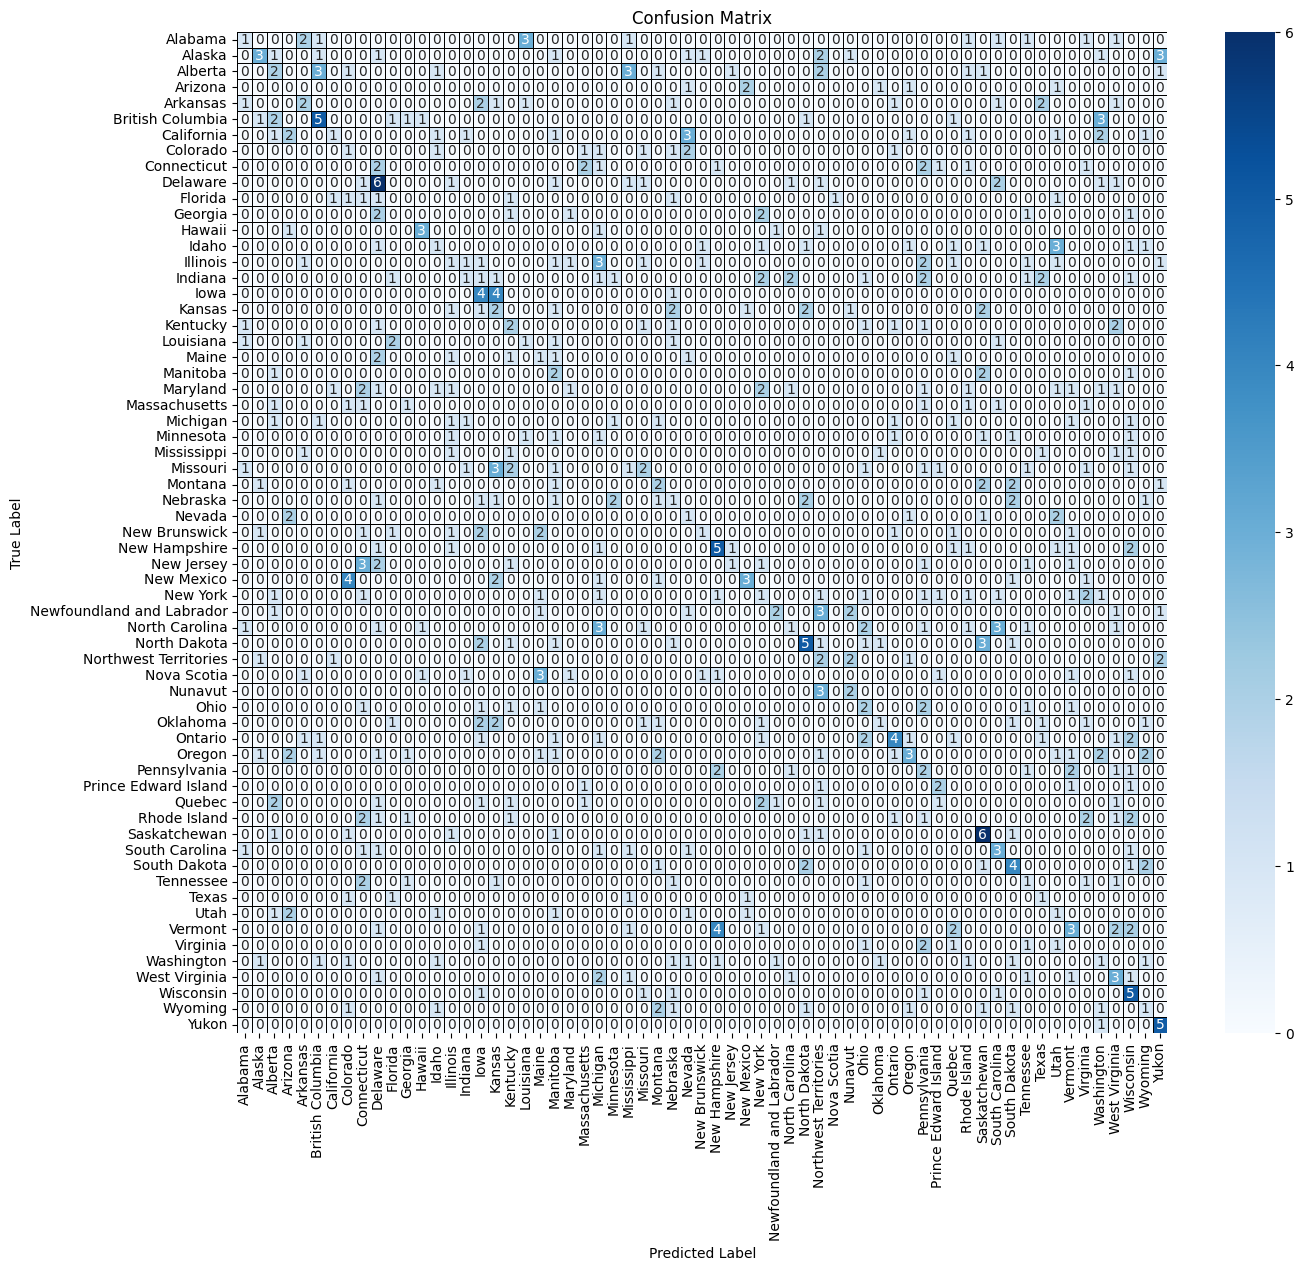

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(15,13))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, linecolor='black', linewidths=0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
files.download('confusion_matrix.png')
plt.show()


In [ ]:
# Compute precision and recall for each class
precision = precision_score(all_labels, all_preds, average=None)
recall = recall_score(all_labels, all_preds, average=None)

# Print precision and recall for each class
print("Class-wise Precision and Recall:")
for i in range(len(precision)):
    print(f"Class {i}: {class_names[i]} - Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}")

# Alternatively, get a full classification report
report = classification_report(all_labels, all_preds, target_names=class_names)
print("\nClassification Report:")
print(report)

Class-wise Precision and Recall:
Class 0: Alabama - Precision = 0.1429, Recall = 0.0769
Class 1: Alaska - Precision = 0.3333, Recall = 0.1875
Class 2: Alberta - Precision = 0.1333, Recall = 0.1176
Class 3: Arizona - Precision = 0.0000, Recall = 0.0000
Class 4: Arkansas - Precision = 0.2222, Recall = 0.1538
Class 5: British Columbia - Precision = 0.3571, Recall = 0.3125
Class 6: California - Precision = 0.2500, Recall = 0.0625
Class 7: Colorado - Precision = 0.0769, Recall = 0.1111
Class 8: Connecticut - Precision = 0.0000, Recall = 0.0000
Class 9: Delaware - Precision = 0.2143, Recall = 0.3529
Class 10: Florida - Precision = 0.0000, Recall = 0.0000
Class 11: Georgia - Precision = 0.0000, Recall = 0.0000
Class 12: Hawaii - Precision = 0.5000, Recall = 0.4286
Class 13: Idaho - Precision = 0.1111, Recall = 0.0769
Class 14: Illinois - Precision = 0.0909, Recall = 0.0588
Class 15: Indiana - Precision = 0.1667, Recall = 0.0588
Class 16: Iowa - Precision = 0.1818, Recall = 0.4444
Class 17: Ka

In [ ]:
with open('classification_report.txt', 'w') as f:
    f.write("Class-wise Precision and Recall:\n")
    for i in range(len(precision)):
        f.write(f"Class {i}: {class_names[i]} - Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}\n")
    f.write("\nFull Classification Report:\n")
    f.write(report)
files.download('classification_report.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def calculate_top_n_accuracy(model, data_loader, n=3):
    model.eval()
    correct_top_n = 0
    total = 0

    with torch.no_grad():
        for features, labels, coords in data_loader:
            if torch.cuda.is_available():
                features = features.cuda()
                labels = labels.cuda()

            # Forward pass
            region_pred, coords_pred = model(features)
            # Get the top N predictions
            _, top_n_preds = torch.topk(region_pred, n, dim=1)

            # Check if the true labels are in the top N predictions
            correct_top_n += torch.sum(torch.eq(top_n_preds, labels.view(-1, 1)).sum(dim=1) > 0).item()
            total += labels.size(0)

    top_n_accuracy = correct_top_n / total
    return top_n_accuracy

top_3_accuracy = calculate_top_n_accuracy(model, test_loader_new, n=3)
top_5_accuracy = calculate_top_n_accuracy(model, test_loader_new, n=5)
top_10_accuracy = calculate_top_n_accuracy(model, test_loader_new, n=10)
top_20_accuracy = calculate_top_n_accuracy(model, test_loader_new, n=20)
top_30_accuracy = calculate_top_n_accuracy(model, test_loader_new, n=30)

print(f"Top-3 Accuracy: {top_3_accuracy:.4f}")
print(f"Top-5 Accuracy: {top_5_accuracy:.4f}")
print(f"Top-10 Accuracy: {top_10_accuracy:.4f}")
print(f"Top-20 Accuracy: {top_20_accuracy:.4f}")
print(f"Top-30 Accuracy: {top_30_accuracy:.4f}")

Top-3 Accuracy: 0.3210
Top-5 Accuracy: 0.4348
Top-10 Accuracy: 0.6228
Top-20 Accuracy: 0.8038
Top-30 Accuracy: 0.8903


<h1>Qualitative Results

In [ ]:
model = geoNet()
model_path = 'model_geo_epoch27'
model.load_state_dict(torch.load(model_path))
model.eval()

geoNet(
  (fc1): Linear(in_features=768, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (classifier): Linear(in_features=64, out_features=63, bias=True)
  (regressor): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:
from transformers import ViTModel, ViTFeatureExtractor, ViTImageProcessor, ViTForImageClassification

In [ ]:
model_name = 'google/vit-base-patch16-224-in21k'
vit = ViTModel.from_pretrained(model_name, attn_implementation="eager")
processor = ViTImageProcessor.from_pretrained(model_name)
use_cuda = True
if use_cuda and torch.cuda.is_available():
  vit.cuda()
  print('CUDA is available!  restnet_features is on GPU ...')
else:
  print('CUDA is not available.  resnet_features is on CPU ...')
vit.eval()
# feature_extractor = ViTFeatureExtractor.from_pretrained(model_name, do_normalize = False)


CUDA is not available.  resnet_features is on CPU ...


ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTAttention(
          (attention): ViTSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation(

In [ ]:
image = Image.open('29.922290, -82.855966.jpg').convert('RGB')
inputs = processor(images=image, return_tensors="pt")

outputs = vit(**inputs, output_attentions = True)
last_hidden_states = outputs.last_hidden_state

In [ ]:
cls_hidden_state = last_hidden_states[:, 0, :]  # Shape: (batch_size, hidden_size)
print(cls_hidden_state.shape)

torch.Size([1, 768])


In [ ]:
with torch.no_grad():
    province_preds, coord_preds = model(cls_hidden_state)

_, predicted_province = torch.max(province_preds, 1)
predicted_coords = coord_preds.cpu().numpy()

class_to_idx = full_dataset.class_to_idx
print(class_to_idx)
idx_to_class = {idx: class_name for class_name, idx in class_to_idx.items()}
print(f"Predicted Province/State Index: {idx_to_class.get(predicted_province.item(), None)}")
print(f"Predicted Coordinates: {predicted_coords}")

{'Alabama': 0, 'Alaska': 1, 'Alberta': 2, 'Arizona': 3, 'Arkansas': 4, 'British Columbia': 5, 'California': 6, 'Colorado': 7, 'Connecticut': 8, 'Delaware': 9, 'Florida': 10, 'Georgia': 11, 'Hawaii': 12, 'Idaho': 13, 'Illinois': 14, 'Indiana': 15, 'Iowa': 16, 'Kansas': 17, 'Kentucky': 18, 'Louisiana': 19, 'Maine': 20, 'Manitoba': 21, 'Maryland': 22, 'Massachusetts': 23, 'Michigan': 24, 'Minnesota': 25, 'Mississippi': 26, 'Missouri': 27, 'Montana': 28, 'Nebraska': 29, 'Nevada': 30, 'New Brunswick': 31, 'New Hampshire': 32, 'New Jersey': 33, 'New Mexico': 34, 'New York': 35, 'Newfoundland and Labrador': 36, 'North Carolina': 37, 'North Dakota': 38, 'Northwest Territories': 39, 'Nova Scotia': 40, 'Nunavut': 41, 'Ohio': 42, 'Oklahoma': 43, 'Ontario': 44, 'Oregon': 45, 'Pennsylvania': 46, 'Prince Edward Island': 47, 'Quebec': 48, 'Rhode Island': 49, 'Saskatchewan': 50, 'South Carolina': 51, 'South Dakota': 52, 'Tennessee': 53, 'Texas': 54, 'Utah': 55, 'Vermont': 56, 'Virginia': 57, 'Washingt

In [ ]:
attentions = outputs.attentions
last_layer_attention = attentions[-1]
cls_attention = last_layer_attention[:, :, 0, :]  # Shape: (batch_size, num_heads, seq_length)

In [ ]:
print(cls_attention.shape)

torch.Size([1, 12, 197])


In [ ]:
import matplotlib.pyplot as plt

# !!!CODE ADAPTED FROM FACEBOOKRESEARCH/DINO @ https://github.com/facebookresearch/dino/blob/main/LICENSE

# Exclude the CLS token from the attention (first token)
patch_attention = cls_attention[:, :, 1:]  # Exclude CLS token along the sequence length dimension

# Reshape the attention to (batch_size, num_heads, 14, 14) for a 14x14 grid of patches
patch_dim = int((patch_attention.size(-1)) ** 0.5)  # Calculate the patch dimension (14 in this case)
patch_attention = patch_attention.view(cls_attention.size(0), cls_attention.size(1), patch_dim, patch_dim)

# Now patch_attention is of shape [1, 12, 14, 14], representing [batch_size, num_heads, height, width]

# If you want to average over the heads to get a single attention map:
avg_patch_attention = patch_attention.mean(dim=1).squeeze(0)  # Shape: [14, 14]

# Resize to match the input image size (224x224)
cls_resized = F.interpolate(avg_patch_attention.unsqueeze(0).unsqueeze(0), (224, 224), mode='bilinear').squeeze(0)


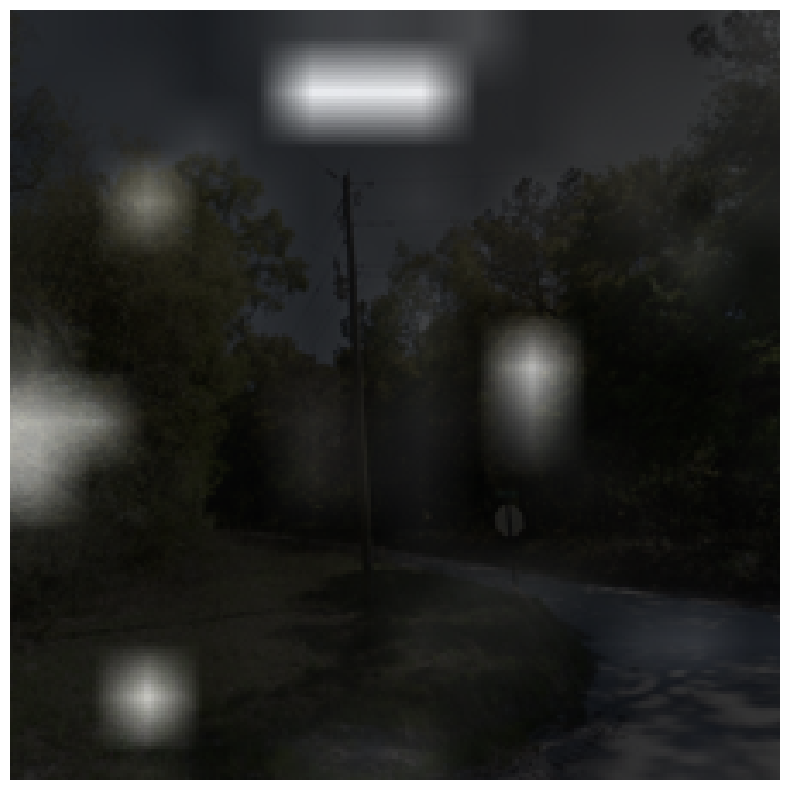

In [ ]:
# Function to display an image
def show_img(img):
    img = np.asarray(img)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Function to overlay two images
def show_img2(img1, img2, alpha=0.8):
    img1 = np.asarray(img1)
    img2 = np.asarray(img2)
    plt.figure(figsize=(10, 10))
    plt.imshow(img1)
    plt.imshow(img2, alpha=alpha)
    plt.axis('off')
    plt.show()

def to_tensor(img):
    transform_fn = transforms.Compose([transforms.Resize(249, 3), transforms.CenterCrop(224), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    return transform_fn(img)

# Load and preprocess the image
img = Image.open('29.922290, -82.855966.jpg').convert('RGB')
x = to_tensor(img)

# Exclude the CLS token from the attention and reshape
patch_attention = cls_attention[:, :, 1:]  # Shape: [1, 12, 196]
patch_dim = int((patch_attention.size(-1)) ** 0.5)  # Calculate the patch dimension (14)
patch_attention = patch_attention.view(cls_attention.size(0), cls_attention.size(1), patch_dim, patch_dim)

# Average over heads to get a single attention map
avg_patch_attention = patch_attention.mean(dim=1).squeeze(0)  # Shape: [14, 14]

# Resize to match the input image size (224x224)
cls_resized = F.interpolate(avg_patch_attention.unsqueeze(0).unsqueeze(0), (224, 224), mode='bilinear').squeeze(0)

# Normalize the attention map for better visualization
cls_resized = cls_resized - cls_resized.min()
cls_resized = cls_resized / cls_resized.max()

# Convert the input tensor to an image format
img_resized = x.permute(1, 2, 0).detach().cpu().detach().numpy() * 0.5 + 0.5

# Convert the attention map to three channels
cls_resized_rgb = cls_resized.expand(3, -1, -1)  # Shape: [3, 224, 224]


# Convert to numpy and change the format to (224, 224, 3)
cls_resized_rgb = cls_resized_rgb.permute(1, 2, 0).cpu().detach().numpy()

# Visualize the results
show_img2(img_resized, cls_resized_rgb, alpha=0.8)

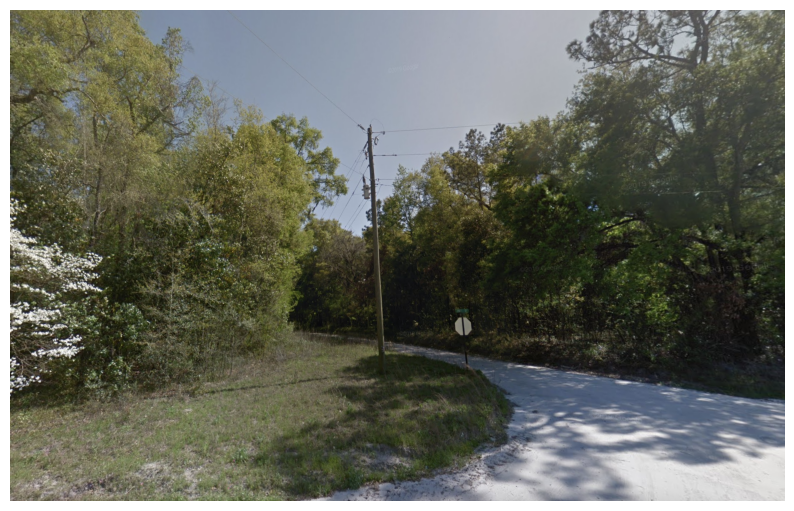

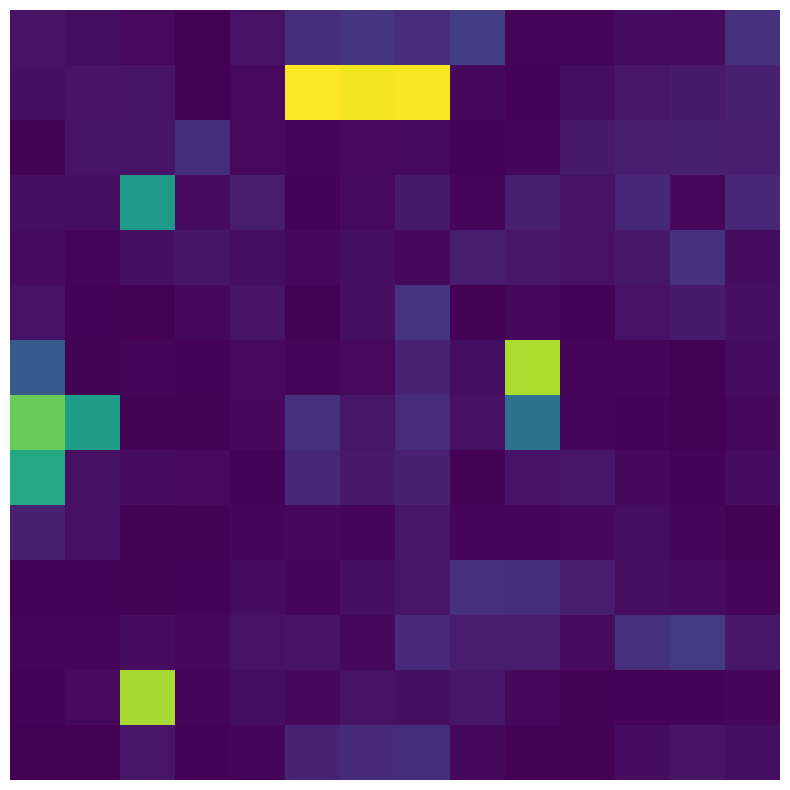

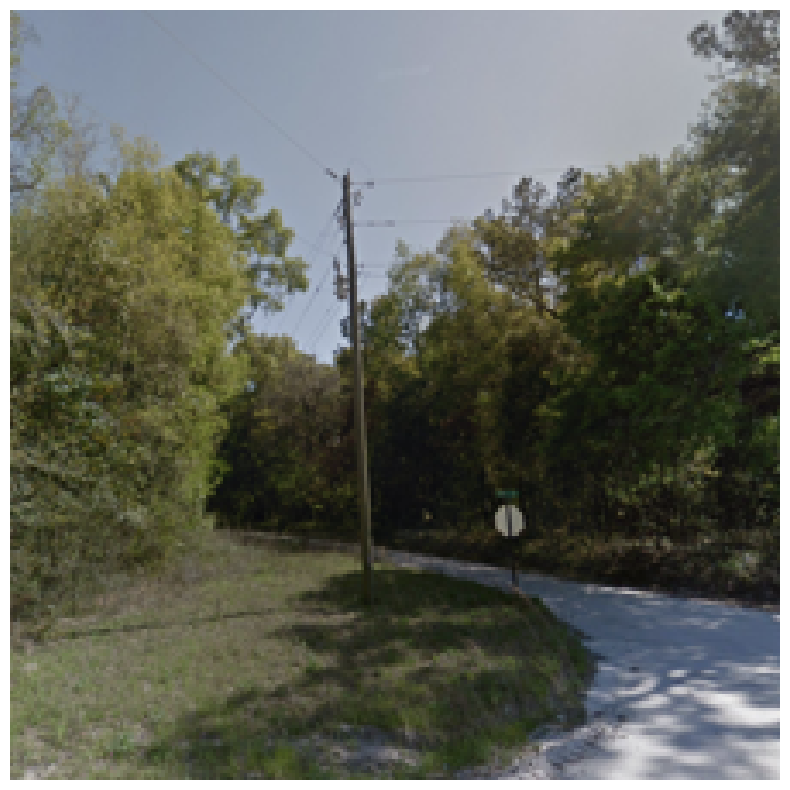

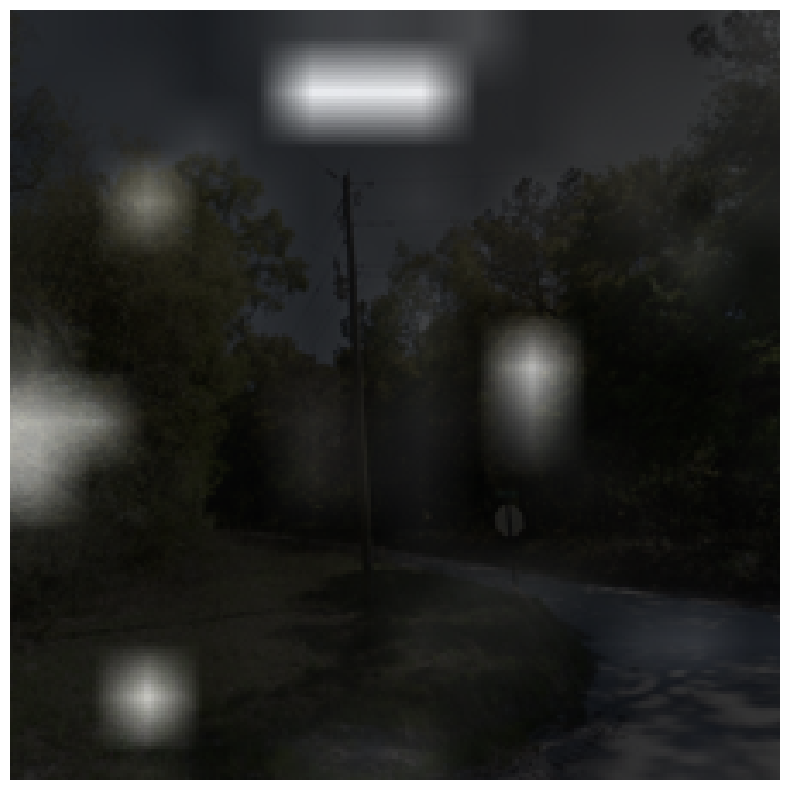

In [ ]:
# Resize the image and attention maps for visualization
img_resized = x.permute(1, 2, 0).detach().cpu().numpy() * 0.5 + 0.5


# Show the images
show_img(img)                # Original image
show_img(avg_patch_attention.cpu().detach().numpy())     # Attention map
show_img(img_resized)        # Resized original image
show_img2(img_resized, cls_resized_rgb, alpha=0.8)  # Overlay image with attention

Retrieving State/Province/Territory From Coordinates

In [ ]:
!pip install geopandas shapely
import geopandas as gpd
from shapely.geometry import Point
shapefile_path = "/content/ne_10m_admin_1_states_provinces.shp"
shapefile = gpd.read_file(shapefile_path)

In [ ]:
# Shapefile method for getting retrieveing states/provinces/territories from coordinates
def get_state(lat, lon):
    point = Point(lon, lat)
    for _, row in shapefile.iterrows():

        if row['geometry'].contains(point):
            return row['name']  # Adjust this to match your shapefile's field for state/province names
    return "Unknown"
print(get_state(35.0019, -114.0396))

<h1>Baseline Model<h1>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class geoCNN(nn.Module):
    def __init__(self):
        super(geoCNN, self).__init__()
        self.name = "CNN"

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(64, 50)
        self.classifier = nn.Linear(50, 63)
        self.regressor = nn.Linear(50, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)  # Flattening for fully connected layers
        x = F.relu(self.fc1(x))
        province_pred = self.classifier(x)
        coords_pred = self.regressor(x)
        return province_pred, coords_pred

<h1>Testing on new data (OLD)

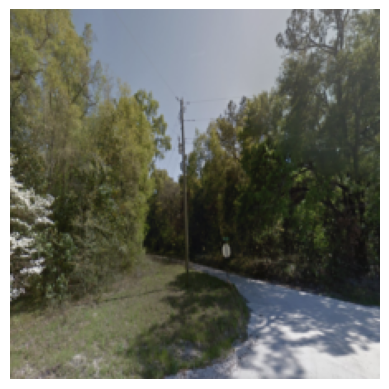

In [ ]:
def crop_bottom(img):
    width, height = img.size
    return img.crop((0, 0, width, height - 18)) #get rid of author label
preprocess = transforms.Compose([
    transforms.Lambda(crop_bottom),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
# Load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = preprocess(image)
    image = image.unsqueeze(0)  # Add batch dimension
    return image
def imshow(img):
    img = img / 2 + 0.5  # Denormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')  # Turn off axis labels
    plt.show()

image_path = '29.922290, -82.855966.jpg'
image = load_image(image_path)
image_to_show = image.squeeze(0)
imshow(image_to_show)

In [ ]:
if use_cuda and torch.cuda.is_available():
    image = image.cuda()

alexnet_features.eval()
with torch.no_grad():
    features = alexnet_features(image)

with torch.no_grad():
    if use_cuda and torch.cuda.is_available():
        features = features.cuda()
    province_preds, coord_preds = model(features)

_, predicted_province = torch.max(province_preds, 1)
predicted_coords = coord_preds.cpu().numpy()

class_to_idx = imagesA.class_to_idx
print(class_to_idx)
idx_to_class = {idx: class_name for class_name, idx in class_to_idx.items()}
print(f"Predicted Province/State Index: {idx_to_class.get(predicted_province.item(), None)}")
print(f"Predicted Coordinates: {predicted_coords}")

{'Alabama': 0, 'Alaska': 1, 'Alberta': 2, 'Arizona': 3, 'Arkansas': 4, 'British Columbia': 5, 'California': 6, 'Colorado': 7, 'Connecticut': 8, 'Delaware': 9, 'Florida': 10, 'Georgia': 11, 'Hawaii': 12, 'Idaho': 13, 'Illinois': 14, 'Indiana': 15, 'Iowa': 16, 'Kansas': 17, 'Kentucky': 18, 'Louisiana': 19, 'Maine': 20, 'Manitoba': 21, 'Maryland': 22, 'Massachusetts': 23, 'Michigan': 24, 'Minnesota': 25, 'Mississippi': 26, 'Missouri': 27, 'Montana': 28, 'Nebraska': 29, 'Nevada': 30, 'New Brunswick': 31, 'New Hampshire': 32, 'New Jersey': 33, 'New Mexico': 34, 'New York': 35, 'Newfoundland and Labrador': 36, 'North Carolina': 37, 'North Dakota': 38, 'Northwest Territories': 39, 'Nova Scotia': 40, 'Nunavut': 41, 'Ohio': 42, 'Oklahoma': 43, 'Ontario': 44, 'Oregon': 45, 'Pennsylvania': 46, 'Prince Edward Island': 47, 'Quebec': 48, 'Rhode Island': 49, 'Saskatchewan': 50, 'South Carolina': 51, 'South Dakota': 52, 'Tennessee': 53, 'Texas': 54, 'Utah': 55, 'Vermont': 56, 'Virginia': 57, 'Washingt

<h1>Splitting (OLD)</h1>

In [ ]:
# The initial path will depend on how you have the images saved

#initialpath = '/content/drive/MyDrive/GeoGuessr_Project_Files'
initialpath = '/content/data/Complete_Raw_Dataset'

# Set lists for training, validation, and test images and labels
trainimg = []
valimg = []
testimg = []
trainlbl = []
vallbl = []
testlbl = []

# Create directories for training, validation, and test data if they don't exist
!mkdir -p /content/Training_Data
!mkdir -p /content/Validation_Data
!mkdir -p /content/Test_Data

# Loop through every state/province in folder
for names in os.listdir(initialpath):
  # Get all image filenames in the current folder
  image_files = [f for f in os.listdir(os.path.join(initialpath, names)) if f.endswith('.jpg')]
  # Shuffle the image files
  random.shuffle(image_files)
  # Set the count for the number of images in a given folder
  count = 0
  # Get the size of the folder
  size = len(os.listdir('/content/data/Complete_Raw_Dataset/{0}'.format(names)))
  for name in os.listdir('/content/data/Complete_Raw_Dataset/{0}'.format(names)):
    if name.endswith(('.jpg')):
      count+=1
      # Get the image path, open it, and convert it to a numpy array
      path = '/content/data/Complete_Raw_Dataset/{0}/{1}'.format(names, name)
      img = Image.open(path)
      #img = np.array(img)
      #Normalizing causes RAM to run out
      #img = img / 255
      lbl = names
      # Data will be given an 80-10-10 split
      # If in first 80% of folder images, make it training data
      if count <= (size * 0.8):
        trainimg.append(img)
        trainlbl.append(lbl)
        img_filename = f'{lbl}_{count}.jpg'  # Using label and index for unique filenames
        img_path = os.path.join('/content/Training_Data', img_filename)
        img.save(img_path)
      # If within 80% to 90% of folder images, make it validation data
      elif count <= (size * 0.9):
        valimg.append(img)
        vallbl.append(lbl)
        img_filename = f'{lbl}_{count}.jpg'  # Using label and index for unique filenames
        img_path = os.path.join('/content/Validation_Data', img_filename)
        img.save(img_path)
      # If in last 10% of folder images, make it test data
      else:
        testimg.append(img)
        testlbl.append(lbl)
        img_filename = f'{lbl}_{count}.jpg'  # Using label and index for unique filenames
        img_path = os.path.join('/content/Test_Data', img_filename)
        img.save(img_path)
  print(count, names)

# All of the prints can be removed
print("Training count: ", len(trainimg), "Validation count: ", len(valimg), "Test count: ", len(testimg))

<h1>Training (OLD)</h1>

In [ ]:
path = '/content/drive/MyDrive/Lab3_Gestures_Summer'
#Convert images to tensors and normalize the pixel values to [-1,1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
#Get image folder for the images supplied
images = torchvision.datasets.ImageFolder(root = path, transform = transform)
#Set random seed for reproducibility
random.seed(11)

full_dataset = datasets.ImageFolder(root=path, transform=transform)

#Shuffle indices in order to randomize the data
indices = list(range(len(full_dataset)))
random.shuffle(indices)

#Determine the indices that correspond to a 80/10/10 split
train_split = int(0.8 * len(indices))
val_split = int(0.1 * len(indices)) + train_split

#Define samplers for each subset of data
train_sampler = SubsetRandomSampler(indices[:train_split])
val_sampler = SubsetRandomSampler(indices[train_split:val_split])
test_sampler = SubsetRandomSampler(indices[val_split:])

#Create the data loaders for use in training the model
train_loader = DataLoader(full_dataset, batch_size=64, sampler=train_sampler)
val_loader = DataLoader(full_dataset, batch_size=64, sampler=val_sampler)
test_loader = DataLoader(full_dataset, batch_size=64, sampler=test_sampler)

print(f"Train set size: {len(train_sampler)}")
print(f"Validation set size: {len(val_sampler)}")
print(f"Test set size: {len(test_sampler)}")

In [ ]:
def training(net, batch_size=128, learning_rate=0.01, num_epochs=20):
    # Get loaders for classes

    # This will be used for downloaded images
    # Data loader is a stand-in for what will be used
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)

    # Cross Entropy Loss and Adam optimizer used
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    trainerr = np.zeros(num_epochs)
    trainloss = np.zeros(num_epochs)
    valerr = np.zeros(num_epochs)
    valloss = np.zeros(num_epochs)

    for epoch in range(num_epochs):
        tottrainloss = 0.0
        tottrainerr = 0.0
        totepoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data


            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the stats
            corr = (outputs > 0.0).squeeze().long() != labels
            tottrainerr += int(corr.sum())
            tottrainloss += loss.item()
            totepoch += len(labels)
        trainerr[epoch] = float(tottrainerr) / totepoch
        trainloss[epoch] = float(tottrainloss) / (i+1)

        # Save the current model (checkpoint) to a file
        #model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        #torch.save(net.state_dict(), model_path)
    print('Finished Training')

    # Write the train/test loss/err into CSV file
    epochs = np.arange(1, num_epochs + 1)



<h1>Our Model (OLD)</h1>

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
from PIL import Image
import os
import zipfile
import matplotlib.pyplot as plt
from google.colab import files
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset, Dataset, Subset
import torch.optim as optim

In [ ]:
# Mostly taken from LargeNet in Lab 2, we will decide on the exact layer count, neurons, etc
# Pooling layers + softmax will be used

# In proj proposal, it said we will use cross entropy loss function and adam optimizer; these are good for classification problems

# ReLU activation function would be good since this is a classification problem and uses a CNN

# I split data into classes and added batch normalization in case we want it

class GeoGuessr(nn.Module):
    def __init__(self):
        super(GeoGuessr, self).__init__()
        self.name = "geoguessr_improved"

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # Residual block
        self.resblock = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128)
        )

        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(128, 100)
        self.fc2 = nn.Linear(100, 80)
        self.fc3 = nn.Linear(80, 63)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))

        # Adding the residual block
        residual = x
        x = self.resblock(x)
        x += residual

        x = self.pool(x)
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)  # Flattening for fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.squeeze(1)
        return x

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Subset
import matplotlib.pyplot as plt # for plotting

In [ ]:
###############################################################################
# HELPER FUNC ADAPTED FROM LAB 2


###############################################################################
# Training
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        if use_cuda and torch.cuda.is_available():
          inputs = inputs.cuda()
          labels = labels.cuda()
        outputs = net(inputs)
        loss = criterion(outputs, labels.long())

        _, predicted = torch.max(outputs, 1)
        total_err += (predicted != labels).sum().item()
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

###############################################################################
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

5959
3813
953
1193


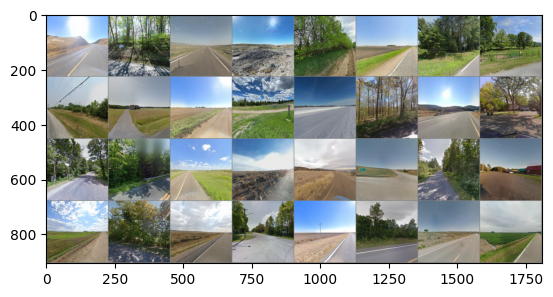

In [ ]:
def get_data_loader(batch_size): #MODIFIED


    def crop_bottom(img):
      width, height = img.size
      return img.crop((0, 0, width, height - 18)) #get rid of author label
    #Convert images to tensors and normalize the pixel values to [-1,1]
    transform = transforms.Compose([
    transforms.Lambda(crop_bottom),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
    ])#Get image folder for the images supplied
    #Load dataset
    dataset = datasets.ImageFolder(root='/content/drive/MyDrive/StreetViewImages/GeoGuessr Project Files', transform=transform)

    # Split data into 80/20 for train/test then split train into 80/20 train/validation
    train_ratio = 0.64
    val_ratio = 0.16
    test_ratio = 0.2

    # Calculate the number of samples in each subset
    total_size = len(dataset)
    print(total_size)
    train_size = int(train_ratio * total_size)
    val_size = int(val_ratio * total_size)
    test_size = total_size - train_size - val_size  # Ensure the remaining samples go to the test set

    # Split the dataset
    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
    print(len(train_dataset)) #Double checking values
    print(len(val_dataset))
    print(len(test_dataset))

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

    return train_loader, val_loader, test_loader

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_images_with_labels(loader):
    # Get a batch of training data
    dataiter = iter(loader)
    images, labels = next(dataiter)

    # Show images
    imshow(torchvision.utils.make_grid(images))


train_loader, val_loader, test_loader= get_data_loader(32)
show_images_with_labels(train_loader)



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # Residual block
        self.resblock = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128)
        )

        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(128, 100)
        self.fc2 = nn.Linear(100, 80)
        self.fc3 = nn.Linear(80, 63)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))

        # Adding the residual block
        residual = x
        x = self.resblock(x)
        x += residual

        x = self.pool(x)
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)  # Flattening for fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [ ]:

def calculate_accuracy_new(net, dataloader):
    #predictions, batch_labels
    model.eval()  # Set model to evaluation mode
    predictions = []
    batch_labels = []

    with torch.no_grad():  # Disable gradient computation
      for batch_features, batch_labels_batch in dataloader:
        if use_cuda and torch.cuda.is_available():
                batch_features = batch_features.cuda()
                batch_labels_batch = batch_labels_batch.cuda()
        # Get model predictions
        outputs = model(batch_features)
        _, predicted = torch.max(outputs.data, 1)

        # Collect predictions and labels
        predictions.extend(predicted.cpu().numpy())
        batch_labels.extend(batch_labels_batch.cpu().numpy())

    predictions = np.array(predictions)
    batch_labels = np.array(batch_labels)
    predicted_northern_borders = np.array([provinces_borders[idx.item()]["northern_border"] for idx in predictions])
    predicted_southern_borders = np.array([provinces_borders[idx.item()]["southern_border"] for idx in predictions])
    predicted_eastern_borders = np.array([provinces_borders[idx.item()]["eastern_border"] for idx in predictions])
    predicted_western_borders = np.array([provinces_borders[idx.item()]["western_border"] for idx in predictions])
    predicted_latitude = (predicted_northern_borders + predicted_southern_borders)/2.0
    predicted_longitude = (predicted_eastern_borders + predicted_western_borders)/2.0
    actual_northern_borders = np.array([provinces_borders[idx.item()]["northern_border"] for idx in batch_labels])
    actual_southern_borders = np.array([provinces_borders[idx.item()]["southern_border"] for idx in batch_labels])
    actual_eastern_borders = np.array([provinces_borders[idx.item()]["eastern_border"] for idx in batch_labels])
    actual_western_borders = np.array([provinces_borders[idx.item()]["western_border"] for idx in batch_labels])
    actual_latitude = (actual_northern_borders + actual_southern_borders)/2.0
    actual_longitude = (actual_eastern_borders + actual_western_borders)/2.0
    predicted_latitude = np.radians(predicted_latitude)
    predicted_longitude = np.radians(predicted_longitude)
    actual_latitude = np.radians(actual_latitude)
    actual_longitude = np.radians(actual_longitude)
    distance = np.arccos(np.sin(actual_latitude) * np.sin(predicted_latitude) +
                         np.cos(actual_latitude) * np.cos(predicted_latitude) * np.cos(predicted_longitude - actual_longitude)) * 6371
    score = np.exp((-1)*distance/700.0)
    return np.mean(score)


def train_net(net, train_loader, val_loader, test_loader, batch_size=64, learning_rate=0.01, num_epochs=15):
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Cross Entropy Loss
    # Optimizer will be SGD with Momentum.
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

    epochs, losses, train_acc, val_acc = [], [], [], []
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        predictions = []
        batch_labels = []
        for inputs, labels in iter(train_loader):

            if use_cuda and torch.cuda.is_available():
                inputs = inputs.cuda()
                labels = labels.cuda()

            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            # Calc train acc
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.cpu().numpy())
            batch_labels.extend(labels.cpu().numpy())
            # Calculate the loss
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            # Zero the parameter gradients
            optimizer.zero_grad()
        # Calc train acc
        predictions = np.array(predictions)
        batch_labels = np.array(batch_labels)
        predicted_northern_borders = np.array([provinces_borders[idx.item()]["northern_border"] for idx in predictions])
        predicted_southern_borders = np.array([provinces_borders[idx.item()]["southern_border"] for idx in predictions])
        predicted_eastern_borders = np.array([provinces_borders[idx.item()]["eastern_border"] for idx in predictions])
        predicted_western_borders = np.array([provinces_borders[idx.item()]["western_border"] for idx in predictions])
        predicted_latitude = (predicted_northern_borders + predicted_southern_borders)/2.0
        predicted_longitude = (predicted_eastern_borders + predicted_western_borders)/2.0
        actual_northern_borders = np.array([provinces_borders[idx.item()]["northern_border"] for idx in batch_labels])
        actual_southern_borders = np.array([provinces_borders[idx.item()]["southern_border"] for idx in batch_labels])
        actual_eastern_borders = np.array([provinces_borders[idx.item()]["eastern_border"] for idx in batch_labels])
        actual_western_borders = np.array([provinces_borders[idx.item()]["western_border"] for idx in batch_labels])
        actual_latitude = (actual_northern_borders + actual_southern_borders)/2.0
        actual_longitude = (actual_eastern_borders + actual_western_borders)/2.0
        predicted_latitude = np.radians(predicted_latitude)
        predicted_longitude = np.radians(predicted_longitude)
        actual_latitude = np.radians(actual_latitude)
        actual_longitude = np.radians(actual_longitude)
        distance = np.arccos(np.sin(actual_latitude) * np.sin(predicted_latitude) +
                            np.cos(actual_latitude) * np.cos(predicted_latitude) * np.cos(predicted_longitude - actual_longitude)) * 6371
        score = np.exp((-1)*distance/700.0)
        # save the current training information
        epochs.append(epoch)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(score)
        val_acc.append(calculate_accuracy_new(model, val_loader))  # compute validation accuracy

        print("Epoch {} Complete, train accuracy: {}, val acc: {}".format(epoch, train_acc[-1], val_acc[-1]))

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # plotting
    plt.title("Training Curve")
    plt.plot(epochs, losses, label="Train")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, val_acc, label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))